Ti = 15 celsius degree 
and a constant flux through the body initial conditions

In [212]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [213]:
def area(r):
  return (r+1)**2

In [214]:
# Constants
alpha = 100
Ti = 200 # K
To = 5 # K
k = 1000 # W/mK
L = 5*10**(0) # m 
A = 1 # m^2
q = 2800 # W/m^2
node = 10
intervall = node - 1
delta_x = L/(intervall)
e = 0

print(delta_x)

0.5555555555555556


In [215]:
# Initializing Material Stiffness Matrix (Direct Stiffness Method)
zero_data = np.zeros(shape=(node,node))
st_mat = pd.DataFrame(zero_data, columns= [i for i in range(1,node + 1)], index = [i for i in range(1,node + 1)])
st_mat

,1,2,3,4,5,6,7,8,9,10
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [216]:
# Constructing Stiffness Matrix (Direct Stiffness Method) 
# element matrix = kA/L[1 -1;-1 1]

# For better performance construction of stiffness matrix can and should be optimized since using for loops is not a very good option
# But for convenience and understanding of concept this is ok for now. 
# There are basically two. The first one using built in numpy methods, or the second one changing the construction principle such as using shape functions
# integrals or even energy methods

for i in range(1,node):
  matrix = pd.DataFrame([[k*area(e)/delta_x, -k*area(e)/delta_x], [-k*area(e)/delta_x, k*area(e)/delta_x]], index = [i,i+1], columns = [i,i+1])
  st_mat = matrix.add(st_mat, fill_value=0)
  e += delta_x
  
st_mat

,1,2,3,4,5,6,7,8,9,10
1,1800.0,-1800.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,-1800.0,6155.555556,-4355.555556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.0,-4355.555556,12377.777778,-8022.222222,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.0,0.000000,-8022.222222,20822.222222,-12800.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.0,0.000000,0.000000,-12800.000000,31488.888889,-18688.888889,0.000000,0.000000,0.000000,0.000000
6,0.0,0.000000,0.000000,0.000000,-18688.888889,44377.777778,-25688.888889,0.000000,0.000000,0.000000
7,0.0,0.000000,0.000000,0.000000,0.000000,-25688.888889,59488.888889,-33800.000000,0.000000,0.000000
8,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,-33800.000000,76822.222222,-43022.222222,0.000000
9,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-43022.222222,96377.777778,-53355.555556
10,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-53355.555556,53355.555556


In [217]:
# First condition constant flux through the geometry
q_vec = np.zeros(shape = (node,1))
q_vec[0] = 2800  
q_vec[-1] = -2800 
q_vec

array([[ 2800.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [    0.],
       [-2800.]])

In [218]:
# Second condition T1 = 15
t = np.zeros(shape = (node, 1))
t[0] = Ti
t

array([[200.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.]])

In [219]:
# Implement this conditions and reduce matrix from 3x3 with a given dof to 2x2 with all unknown dofs

In [220]:
q_vec[1] = q_vec[1]-(t[0] * st_mat.iloc[1,0])
q_vec

array([[  2800.],
       [360000.],
       [     0.],
       [     0.],
       [     0.],
       [     0.],
       [     0.],
       [     0.],
       [     0.],
       [ -2800.]])

In [221]:
q_vec = q_vec[1:]
q_vec

array([[360000.],
       [     0.],
       [     0.],
       [     0.],
       [     0.],
       [     0.],
       [     0.],
       [     0.],
       [ -2800.]])

In [222]:
new_st_mat = st_mat.iloc[1:,1:]
new_st_mat

,2,3,4,5,6,7,8,9,10
2,6155.555556,-4355.555556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,-4355.555556,12377.777778,-8022.222222,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,-8022.222222,20822.222222,-12800.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,-12800.000000,31488.888889,-18688.888889,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,-18688.888889,44377.777778,-25688.888889,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,-25688.888889,59488.888889,-33800.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,-33800.000000,76822.222222,-43022.222222,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-43022.222222,96377.777778,-53355.555556
10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-53355.555556,53355.555556


In [223]:
invv = np.linalg.inv(new_st_mat)
temp_profile = np.matmul(invv,q_vec)
# temp_profile

In [224]:
temp_profile = np.insert(temp_profile, 0, Ti)
# temp_profile
distance = [i*delta_x for i in range(0, len(temp_profile))]
# distance

In [225]:
temp_profile

array([200.        , 198.44444444, 197.8015873 , 197.45255683,
       197.23380683, 197.08398519, 196.97498865, 196.89214841,
       196.82706577, 196.77458763])

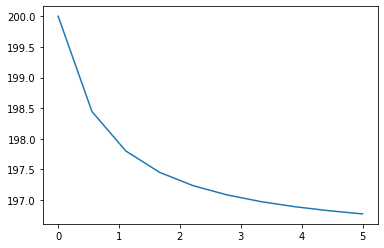

In [226]:
plt.plot(distance[:50], temp_profile[:50])

In [227]:
plt.savefig("ChangingGeometry_1D_Steady_State_Heat_Transfer_FEM.jpg")

<Figure size 432x288 with 0 Axes>